# Landsat 9 scene of the Mauna Loa eruption - 2022/12/02

This notebook loads and plots a color composite of the latest Landsat 9 scene of the eruption. The scene was downloaded from [USGS EarthExplorer](https://earthexplorer.usgs.gov/) (ID `LC09_L2SP_063046_20221202_20221204_02_T1`) and selected bands were uploaded to figshare in a compressed archive (https://doi.org/10.6084/m9.figshare.21677246). 

In [1]:
import matplotlib.pyplot as plt
import xlandsat as xls
import pooch

First, we'll use [Pooch](https://www.fatiando.org/pooch) to download the archive with the scene.

In [2]:
archive = pooch.retrieve(
    "doi:10.6084/m9.figshare.21677246.v1/LC09_L2SP_063046_20221202_20221204_02_T1.tar.gz",
    known_hash="md5:3b2cb5dc4dbd4fbfad595124e9a59152",
    progressbar=True,
)
print(archive)

/home/leo/.cache/pooch/47c477ba3eff1d002154dfb4e9df5104-LC09_L2SP_063046_20221202_20221204_02_T1.tar.gz


Next, we'll use the [xlandsat](https://www.compgeolab.org/xlandsat/) package to load a section of the scene into an `xarray.Dataset`.

In [3]:
region = [185000, 260000, 2140000, 2190000]  # UTM West, East, South, North
scene = xls.load_scene(archive, region=region)
scene

<xarray.Dataset>
Dimensions:   (easting: 2500, northing: 1667)
Coordinates:
  * easting   (easting) float64 1.85e+05 1.85e+05 1.851e+05 ... 2.6e+05 2.6e+05
  * northing  (northing) float64 2.14e+06 2.14e+06 ... 2.19e+06 2.19e+06
Data variables:
    blue      (northing, easting) float16 -0.03455 -0.01282 ... 0.0575 0.05847
    green     (northing, easting) float16 -0.003296 0.009155 ... 0.07019 0.07141
    red       (northing, easting) float16 -0.02148 -0.005188 ... 0.06677 0.06775
    nir       (northing, easting) float16 0.001953 0.01257 ... 0.1622 0.1593
    swir1     (northing, easting) float16 0.05225 0.05237 ... 0.1152 0.1162
    swir2     (northing, easting) float16 0.0614 0.05994 ... 0.08472 0.08704
    thermal   (northing, easting) float16 294.2 294.5 295.0 ... 290.0 290.0
Attributes: (12/62)
    Conventions:                     CF-1.8
    title:                           Landsat 9 scene from 2022-12-02 (path/ro...
    origin:                          Image courtesy of the U.S. Geological Su...
    digital_object_identifier:       https://doi.org/10.5066/P9OGBGM6
    landsat_product_id:              LC09_L2SP_063046_20221202_20221204_02_T1
    processing_level:                L2SP
    ...                              ...
    temperature_mult_band_st_b10:    0.00341802
    temperature_add_band_st_b10:     149.0
    reflectance_mult_band_8:         2e-05
    reflectance_mult_band_9:         2e-05
    reflectance_add_band_8:          -0.1
    reflectance_add_band_9:          -0.1

Make an RGB composite to get an idea of what's going on.

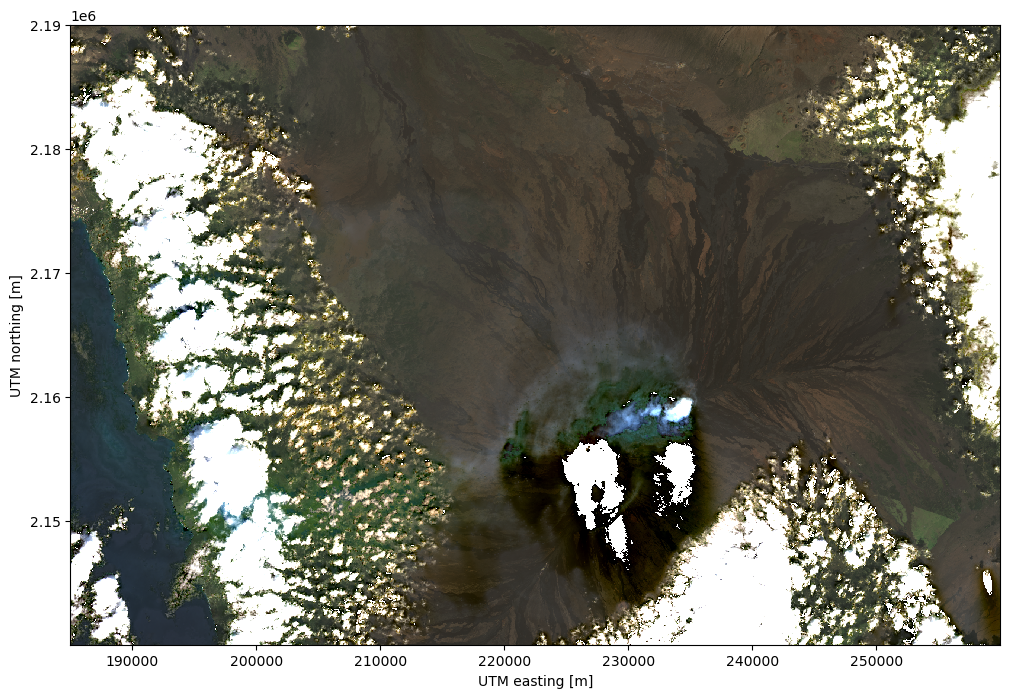

In [4]:
rgb = xls.composite(scene, rescale_to=(0, 0.3))

fig = plt.figure(figsize=(12, 10))
ax = plt.gca()
rgb.plot.imshow(ax=ax)
ax.set_aspect("equal")
plt.show()

Can't really see much because of smoke and the lava flows are dark at this scale. 

We'll make a composite using the SWIR and NIR bands to highlight the active lava flow. It looks unnatural but offers a good glimpse of what's currently active. 

In [5]:
infrared = xls.composite(scene, bands=("swir2", "swir1", "nir"), rescale_to=(0, 0.35))

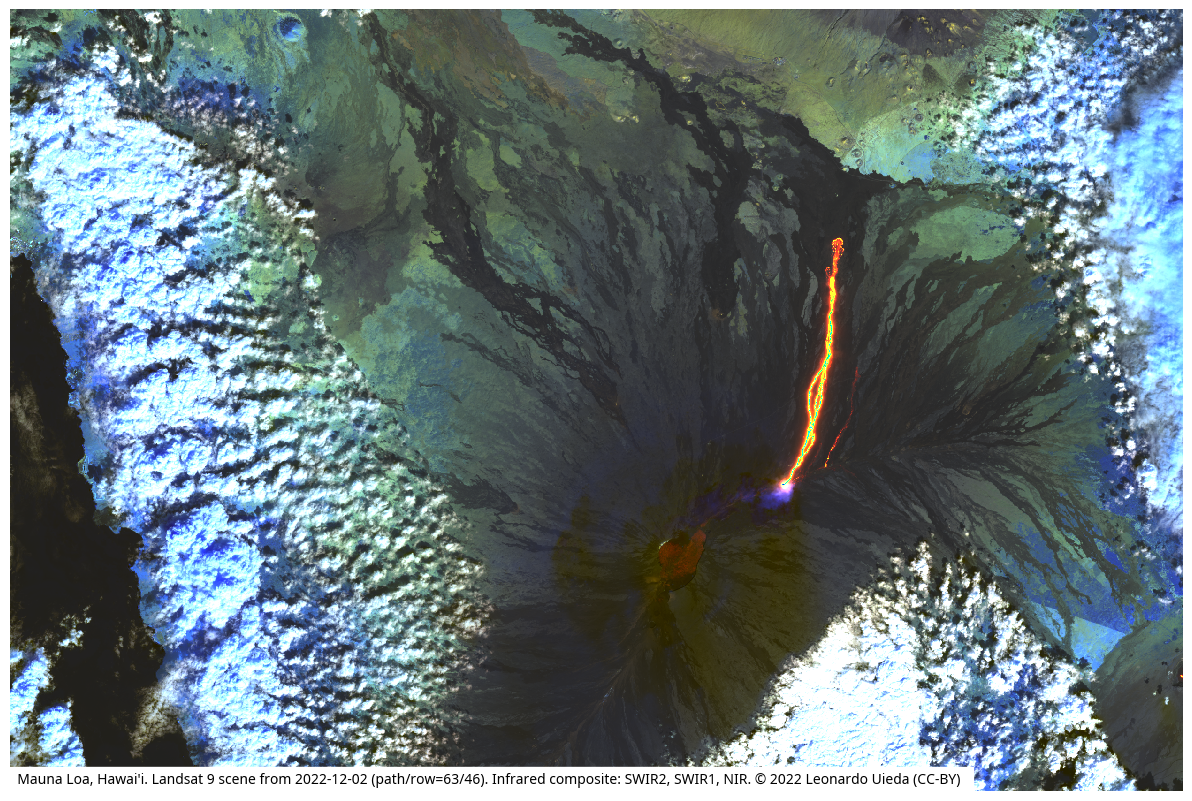

In [8]:
fig = plt.figure(figsize=(12, 10))
ax = plt.gca()
infrared.plot.imshow(ax=ax, interpolation="none")
ax.set_aspect("equal")
ax.axis("off")
text = f"  Mauna Loa, Hawai'i. {scene.attrs['title']}. Infrared composite: SWIR2, SWIR1, NIR. © 2022 Leonardo Uieda (CC-BY)  "
ax.text(
    0, 0.01, 
    text, 
    transform=ax.transAxes,
    backgroundcolor="white",
    fontsize=10,
    ha="left",
    fontfamily="Noto Sans",
)
fig.tight_layout(pad=0)
plt.savefig("mauna-loa-landsat-2022-12-02.jpg", bbox_inches="tight", pad_inches=0, dpi=600)
plt.savefig("mauna-loa-landsat-2022-12-02-low-res.jpg", bbox_inches="tight", pad_inches=0, dpi=200)
plt.show()

Now even the main crater appears as slight red and the current active flow is very clear.